# Hello World - Deeplearning

This is the Hello World equivalent in deeplearning. <br/>
With this, we are trying to identify Cats from Dogs.

## Setting Up
This is how we install fastai and setup our notebook

In [3]:
!pip install fastai2
!git clone https://github.com/arunoda/deeplearning.git
%cd 'deeplearning'

Cloning into 'deeplearning'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 27 (delta 3), reused 14 (delta 3), pack-reused 13
Unpacking objects: 100% (27/27), done.
/content/deeplearning/deeplearning


In [0]:
from fastai2.vision.all import *

## Inspecting Images

In [6]:
im_path = untar_data(URLs.PETS)

In [7]:
im_path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
image_list = (im_path/"images").ls()
image_list

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_173.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_183.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_174.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_185.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_171.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_68.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_111.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_177.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_158.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_60.jpg')...]

/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_173.jpg


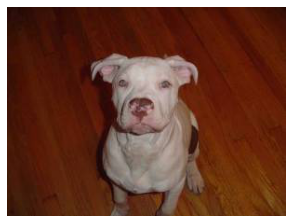

In [9]:
print(image_list[0])
show_image(Image.open(image_list[0]))

/root/.fastai/data/oxford-iiit-pet/images/Birman_183.jpg


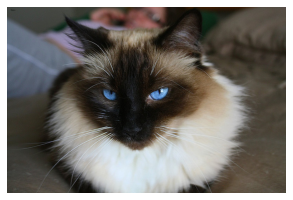

In [10]:
print(image_list[1])
show_image(Image.open(image_list[1]))

In this dataset, dognames starts with a **single letter** while cat names starts with a **capital letter**

## Let's load images

In [0]:
def cat_or_dog(p):
    if p.name[0].isupper():
        return 'cat'
    else:
        return 'dog'

In [12]:
cat_or_dog(image_list[0]), cat_or_dog(image_list[1])

('dog', 'cat')

In [0]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.3),
    item_tfms=Resize(224),
    get_y=cat_or_dog
)

In [0]:
dls = db.dataloaders(im_path/"images")

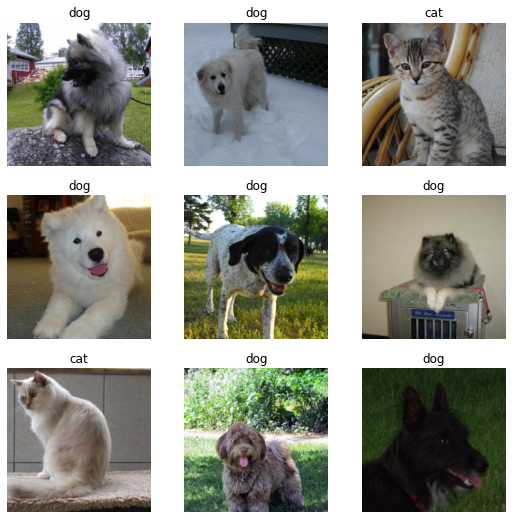

In [15]:
dls.show_batch()

## Let's Train Our Model

In [16]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [17]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.159050,0.021287,0.992332,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.100353,0.045505,0.989626,00:49
1,0.041336,0.010070,0.997294,00:49


Hmm. This is pretty good. Our accuracy is **99+%** without doing much.

## Now Let's Do Some Predictions

In [0]:
from ipywidgets import widgets

In [20]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [0]:
im_uploaded = PILImage.create(uploader.data[0])

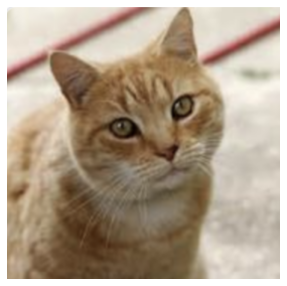

In [22]:
show_image(im_uploaded)

In [23]:
learn.predict(im_uploaded)

('cat', tensor(0), tensor([1.0000e+00, 8.2611e-15]))

In [24]:
uploader

FileUpload(value={'Screenshot 2020-05-16 at 19.04.07.png': {'metadata': {'lastModified': 1589636050165, 'type'…

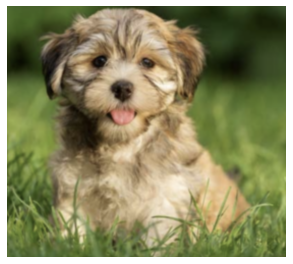

In [25]:
im_uploaded = PILImage.create(uploader.data[0])
show_image(im_uploaded)

In [26]:
learn.predict(im_uploaded)

('dog', tensor(1), tensor([8.1184e-06, 9.9999e-01]))

**That's it.**